In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
%reload_ext Cython
import multiprocessing as mp

basepath = os.path.expanduser('../')

## Load Data

In [3]:
%%time

app_train = pd.read_feather(os.path.join(basepath, 'data/processed/application_train.feather'))
app_test  = pd.read_feather(os.path.join(basepath, 'data/processed/application_test.feather'))

bureau    = pd.read_feather(os.path.join(basepath, 'data/processed/bureau.feather'))
prev_app  = pd.read_pickle(os.path.join(basepath, 'data/processed/prev_app.pkl'))

CPU times: user 435 ms, sys: 401 ms, total: 836 ms
Wall time: 4.68 s


In [47]:
%%time

tr = app_train.loc[:, ['SK_ID_CURR']].merge(prev_app.loc[:, ['SK_ID_CURR', 'DAYS_DECISION']],
                                            on='SK_ID_CURR',
                                            how='left'
                                           )

te = app_test.loc[:, ['SK_ID_CURR']].merge(prev_app.loc[:, ['SK_ID_CURR', 'DAYS_DECISION']],
                                           on='SK_ID_CURR',
                                           how='left'
                                          )

CPU times: user 516 ms, sys: 0 ns, total: 516 ms
Wall time: 519 ms


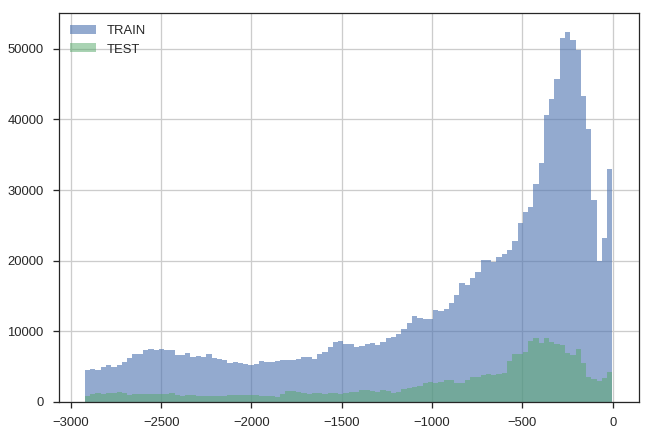

In [50]:
tr.DAYS_DECISION.hist(bins=100, alpha=.6, label='TRAIN')
te.DAYS_DECISION.hist(bins=100, alpha=.5, label='TEST')
plt.legend(loc='best');

In [14]:
%%time

tr = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_ENDDATE_FACT']]\
           .merge(prev_app.loc[:, ['SK_ID_CURR', 'DAYS_DECISION']], how='left')

CPU times: user 687 ms, sys: 299 ms, total: 986 ms
Wall time: 991 ms


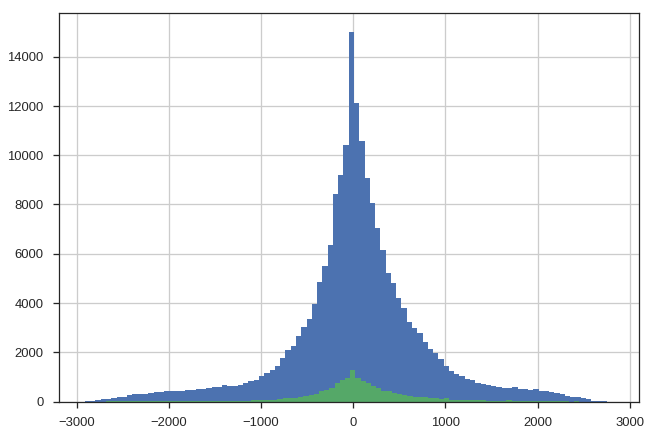

In [21]:
res = tr.groupby('SK_ID_CURR')[['DAYS_ENDDATE_FACT', 'DAYS_DECISION']].max()
res = res.DAYS_DECISION - res.DAYS_ENDDATE_FACT
res = app_train.SK_ID_CURR.map(res)

res[(app_train.TARGET == 0)].hist(bins=100)
res[(app_train.TARGET == 1)].hist(bins=100);

In [4]:
%%time

tr = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT']]\
           .merge(prev_app.loc[:, ['SK_ID_CURR', 'DAYS_DECISION']], how='left')

CPU times: user 618 ms, sys: 329 ms, total: 947 ms
Wall time: 953 ms


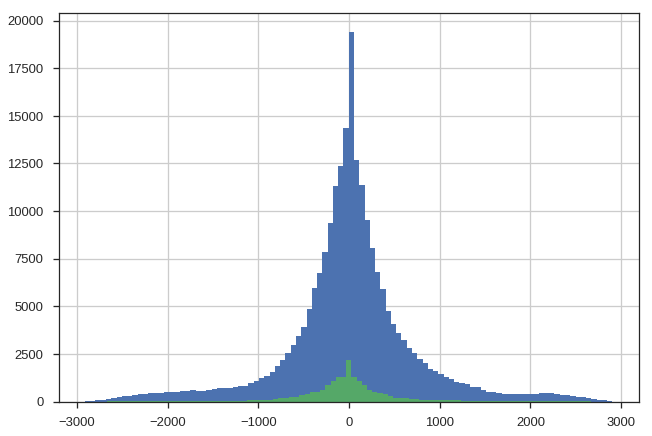

In [6]:
res = tr.groupby('SK_ID_CURR')[['DAYS_CREDIT', 'DAYS_DECISION']].max()
res = res.DAYS_DECISION - res.DAYS_CREDIT
res = app_train.SK_ID_CURR.map(res)

res[(app_train.TARGET == 0)].hist(bins=100)
res[(app_train.TARGET == 1)].hist(bins=100);

In [7]:
%%time

tr = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT_ENDDATE']]\
           .merge(prev_app.loc[:, ['SK_ID_CURR', 'DAYS_DECISION']], how='left')

CPU times: user 713 ms, sys: 378 ms, total: 1.09 s
Wall time: 1.1 s


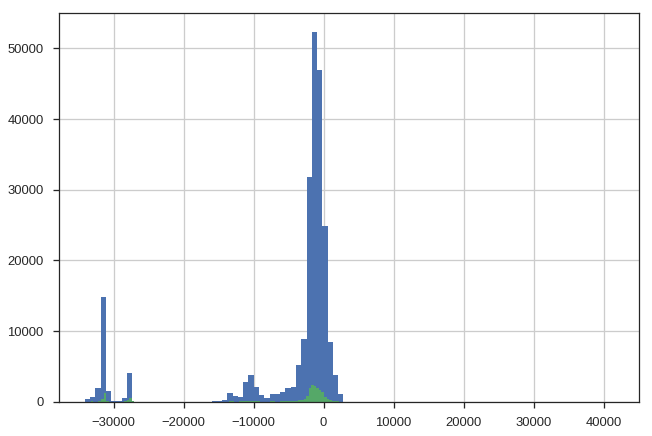

In [8]:
res = tr.groupby('SK_ID_CURR')[['DAYS_CREDIT_ENDDATE', 'DAYS_DECISION']].max()
res = res.DAYS_DECISION - res.DAYS_CREDIT_ENDDATE
res = app_train.SK_ID_CURR.map(res)

res[(app_train.TARGET == 0)].hist(bins=100)
res[(app_train.TARGET == 1)].hist(bins=100);

In [16]:
%%time

tr = bureau.loc[:, ['SK_ID_CURR', 'SK_ID_BUREAU', 'DAYS_CREDIT_ENDDATE']]\
           .merge(prev_app.loc[:, ['SK_ID_CURR', 'DAYS_TERMINATION']]\
                          .replace({'DAYS_TERMINATION': {365243: np.nan}}), how='left')

CPU times: user 704 ms, sys: 327 ms, total: 1.03 s
Wall time: 1.03 s


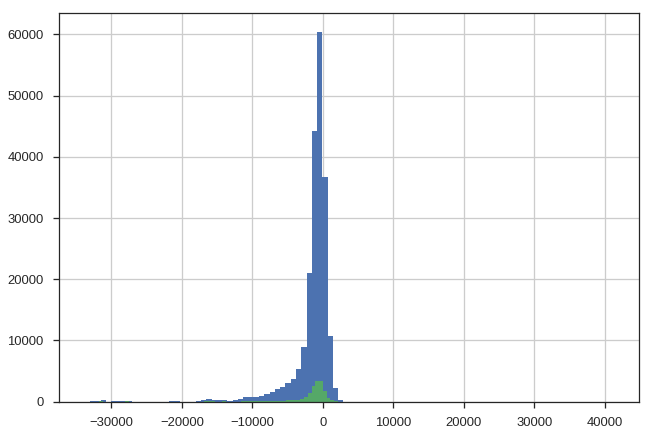

In [21]:
res = tr.groupby('SK_ID_CURR')[['DAYS_CREDIT_ENDDATE', 'DAYS_TERMINATION']].mean()
res = res.DAYS_TERMINATION - res.DAYS_CREDIT_ENDDATE
res = app_train.SK_ID_CURR.map(res)

res[(app_train.TARGET == 0)].hist(bins=100)
res[(app_train.TARGET == 1)].hist(bins=100);